## Nom: LEMES DE MEDEIROS
## Prénom: Célio Lucas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from scipy import stats as st
from scipy.stats import f_oneway
from critdd.diagram import Diagram

In [2]:
df = pd.read_csv('parkinsons.data.csv')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
df = df.iloc[:, 1:]

In [4]:
df.shape

(195, 23)

In [5]:
df.dtypes

MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [6]:
df['status'].unique()

array([1, 0], dtype=int64)

In [7]:
print("Number of individuals within class 0:", (df['status']).value_counts()[0])
print("Number of individuals within class 1:", (df['status']).value_counts()[1])

Number of individuals within class 0: 48
Number of individuals within class 1: 147


In [8]:
cols = [col for col in df.columns if col != 'status']
cols.append('status')

df = df.reindex(columns=cols)

## Standardization

In [9]:
scaler = StandardScaler()
scaler.fit(df.iloc[:, :-1])

StandardScaler()

## KNN

In [10]:
X, y = df.iloc[:, :-1], df['status']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
neighbors = [1, 3, 5]
for n in neighbors:
    neigh = KNeighborsClassifier(n_neighbors=n)
    y_pred = cross_val_predict(neigh, X, y, cv=5)

    precision = precision_score(y, y_pred)  
    recall = recall_score(y, y_pred)

    print("Precision for", n, "neighbors:", precision.round(2))
    print("Recall for", n, "neighbors:", recall.round(2))

Precision for 1 neighbors: 0.77
Recall for 1 neighbors: 0.82
Precision for 3 neighbors: 0.78
Recall for 3 neighbors: 0.86
Precision for 5 neighbors: 0.79
Recall for 5 neighbors: 0.88


## SVM

In [12]:
kernels = ['rbf', 'poly']
for kernel in kernels:
    model_svc = svm.SVC(kernel=kernel)
    y_pred = cross_val_predict(model_svc, X, y, cv=5)
    precision = precision_score(y, y_pred)  
    recall = recall_score(y, y_pred)

    print("Precision for the", kernel, "kernel of SVC:", precision.round(2))
    print("Recall for the", kernel, "kernel of SVC:", recall.round(2))

Precision for the rbf kernel of SVC: 0.79
Recall for the rbf kernel of SVC: 0.97
Precision for the poly kernel of SVC: 0.8
Recall for the poly kernel of SVC: 0.98


## Random Forest

In [13]:
rf = RandomForestClassifier()

y_pred = cross_val_predict(model_svc, X, y, cv=5)
precision = precision_score(y, y_pred)  
recall = recall_score(y, y_pred)

print("Precision for the Random Forest:", precision.round(2))
print("Recall for the Random Forest:", recall.round(2))

Precision for the Random Forest: 0.8
Recall for the Random Forest: 0.98


## Tests sur les variables

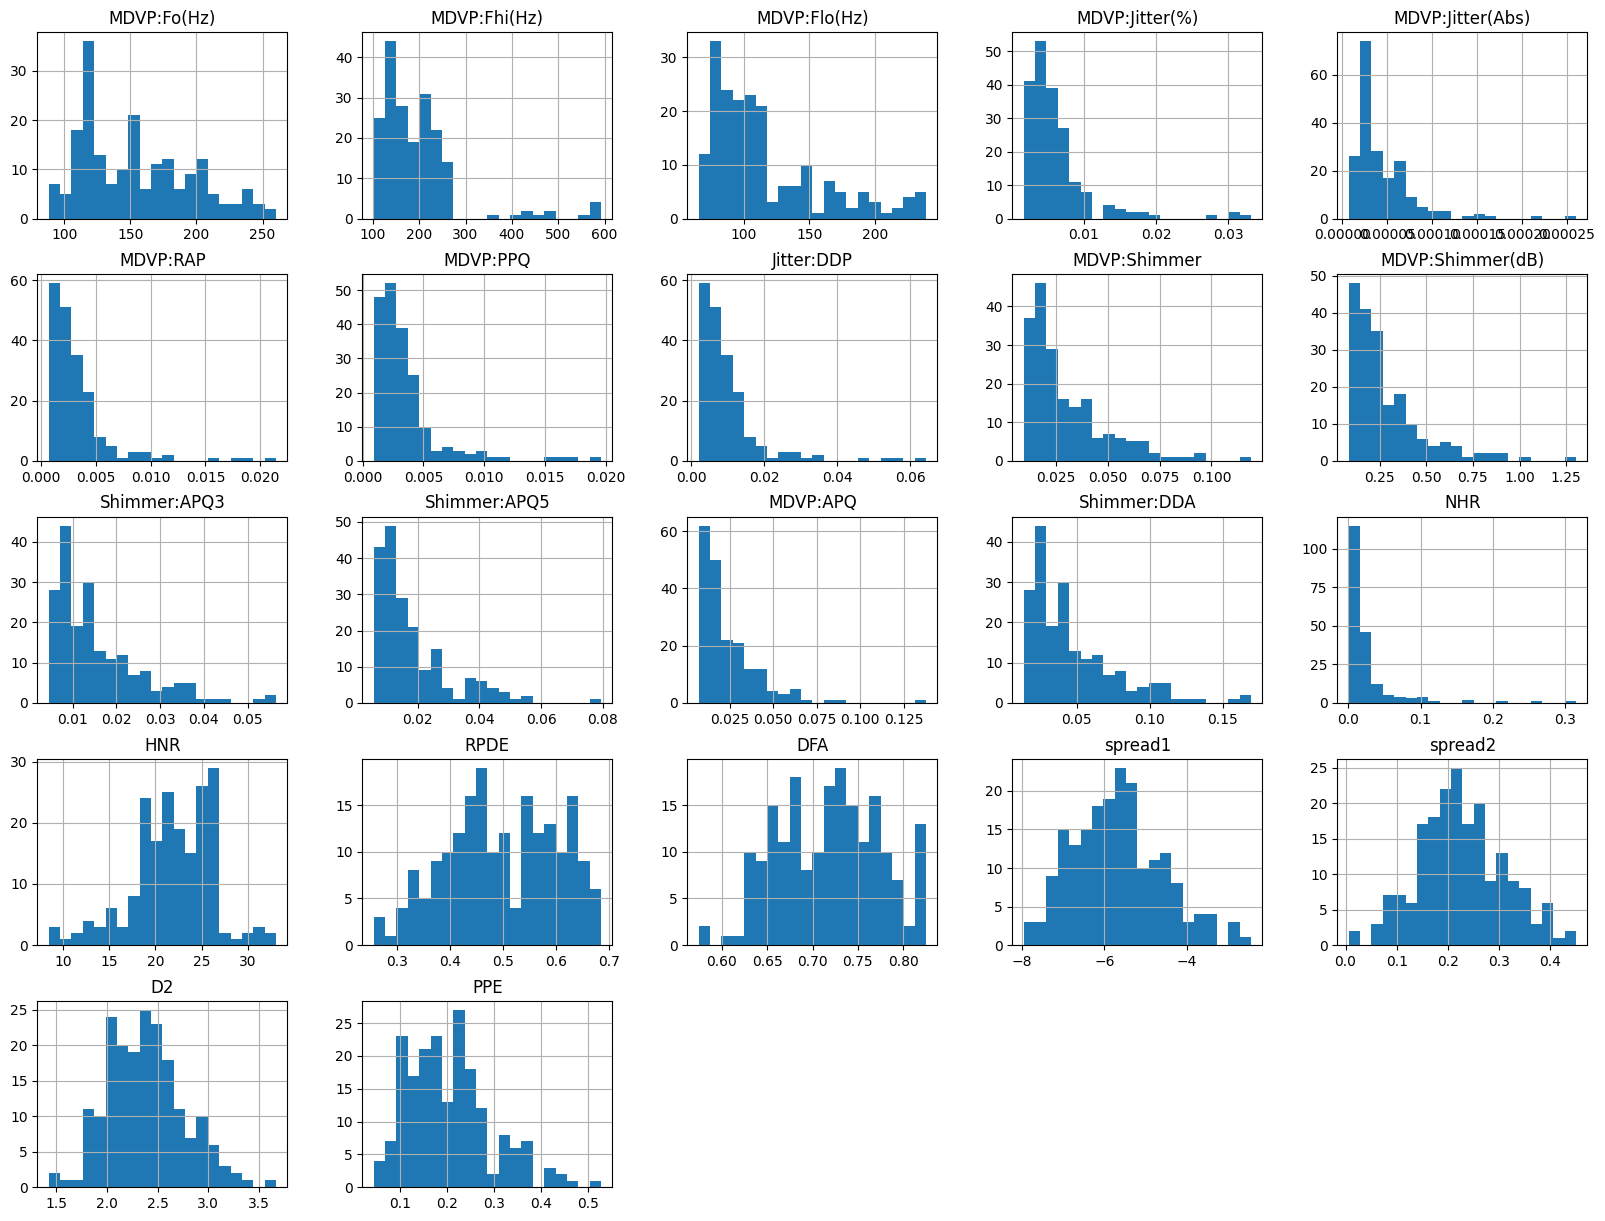

In [14]:
df.iloc[:, :-1].hist(figsize=(20, 15), bins=20)

plt.show()

### Tests d'adéquation

#### À partir des histogrammes des variables (colonnes), les colonnes *spread1* et *spread2* semblent suivre une distribution normale. Des tests d'adéquation seront effectués avec les méthodes de Lilliefors et Shapiro-Wilk pour vérifier les hypothèses.

#### Déterminant le niveau de significance comme α = 0.05, les hypothèses suivantes seront testées :

##### $H0$: L'échantillon n'est pas significativement différent d'une population normale
##### $H1$: L'échantillon est significativement différent d'une population normale

In [15]:
# Niveau de significance
alpha = 0.05

In [16]:
# Tests d'adéquation pour la variable spread1
data = df['spread1']

ksstat, pvalue = sm.stats.diagnostic.lilliefors(data)
if pvalue > alpha:
    result = 'Non rejet de H0'
else:
    result = 'Rejet de H0'
print(f'Lilliefors : {result:>21s}')
print(f'Valeur pour le p-value : {pvalue}')

print('------------------------------------')

statistic, pvalue = st.shapiro(data)
if pvalue > alpha:
    result = 'Non rejet de H0'
else:
    result = 'Rejet de H0'
print(f'Shapiro-Wilk : {result:>19s}')
print(f'Valeur pour le p-value : {pvalue}')

Lilliefors :       Non rejet de H0
Valeur pour le p-value : 0.23044246328502835
------------------------------------
Shapiro-Wilk :         Rejet de H0
Valeur pour le p-value : 0.025684150114684935


In [17]:
# Tests d'adéquation pour la variable spread2
data = df['spread2']

ksstat, pvalue = sm.stats.diagnostic.lilliefors(data)
if pvalue > alpha:
    result = 'Non rejet de H0'
else:
    result = 'Rejet de H0'
print(f'Lilliefors : {result:>21s}')
print(f'Valeur pour le p-value : {pvalue}')

print('------------------------------------')

statistic, pvalue = st.shapiro(data)
if pvalue > alpha:
    result = 'Non rejet de H0'
else:
    result = 'Rejet de H0'
print(f'Shapiro-Wilk : {result:>19s}')
print(f'Valeur pour le p-value : {pvalue}')

Lilliefors :       Non rejet de H0
Valeur pour le p-value : 0.260182444990617
------------------------------------
Shapiro-Wilk :     Non rejet de H0
Valeur pour le p-value : 0.6544442622997289


#### Comme la variable *spread1* a été rejetée dans l'un des tests d'adéquation, le test paramétrique sera effectué avec la variable *spread2*, où nous vérifions qu'elle suit une distribution normale à un niveau de confiance de 95% dans les deux tests.

### Test paramétrique

#### Comme la variance de la population est inconnue, un test bilatéral sera utilisé pour vérifier les hypothèses concernant l'espérance de la moyenne de la population.

In [18]:
moyenne_spread2 = df['spread2'].mean()
moyenne_spread2

0.22651034871794873

#### Les hypothèses sont les suivantes :

$H0: \mu = 0.23$\
$H1: \mu \ne 0.23$

In [19]:
var_spread2 = df['spread2'].var()
n = 195

# Calculer le t-score
t_score = abs((moyenne_spread2 - 0.23)) / (var_spread2 / np.sqrt(n))
p_value = st.t.sf(t_score, n-1) * 2

if p_value > alpha:
    result = 'Non rejet de H0'
else:
    result = 'Rejet de H0'
print(f'Résultat : {result:>21s}')
print(f'Valeur pour le p-value : {p_value}')

Résultat :           Rejet de H0
Valeur pour le p-value : 3.9576195631783745e-11


#### Au niveau de confiance de 95%, nous rejetons $H0$ avec une moyenne $\mu = 0.23$.

### Test de comparaison d’échantillon

In [20]:
# ANOVA

class_0 = df['status'] == 0
class_0 = df.loc[class_0]
class_0 = class_0['spread2']

class_1 = df['status'] == 1
class_1 = df.loc[class_1]
class_1 = class_1['spread2']

##### Les hypothèses pour comparer les moyennes de plusieurs échantillons à l'aide de l'ANOVA sont les suivantes :

##### $H0$ : μ1 = μ2 = μ3 = ... = μk (cela implique que les moyennes de toutes les populations sont égales)

##### $H1$ : Elle stipule qu'il y aura au moins une moyenne de population différente des autres

In [21]:
# Faire la comparaison avec ANOVA
f_oneway(class_0, class_1)

F_onewayResult(statistic=50.343164804281514, pvalue=2.391728762371224e-11)

#### Comme le p-value est inférieure au niveau de significance établi, nous rejetons l'hypothèse nulle qui stipule que les moyennes des deux échantillons (différenciés par la classe dans cet exercice) seraient identiques.

### Diagramme des différences critiques

In [22]:
df = pd.read_csv('resultatsDonnees.csv')
df = df.iloc[1:-1, 7:-1]
df

,KNN (k=1),Unnamed: 8,KNN (k=3),Unnamed: 10,KNN (k=5),Unnamed: 12,SVM (RBF),Unnamed: 14,SVM (poly),Unnamed: 16,RF,Unnamed: 18
1,0.9344262295081968,0.9375,0.9508196721311475,0.9375,0.9508196721311475,0.96875,0.9672131147540983,0.96875,0.9508196721311475,0.96875,0.9836065573770492,1.0
2,0.69999999999999996,0.80000000000000004,0.80000000000000004,0.90000000000000002,0.80000000000000004,0.90000000000000002,0.80000000000000004,0.90000000000000002,0.80000000000000004,0.90000000000000002,0.80000000000000004,0.90000000000000002
3,0.82,0.828,0.788,0.814,0.792,0.816,0.781,0.781,0.781,0.781,0.973,0.974
4,0.98,0.99,0.96,0.98,0.98,0.99,0.97,0.97,0.99,1.00,0.98,0.99
5,0.87,0.84,0.83,0.81,0.83,0.81,0.84,0.84,0.85,0.9,0.9,0.87
6,0.9267399,0.9226261,0.9407499,0.9360812,0.9394856,0.9344301,0.9454110,0.9426166,0.9349932310947355,0.91797401,0.93847299,0.93536443
7,0.8,0.5,0.8,0.5,0.8,0.5,0.81,0.9,0.81,0.9,0.81,0.9
8,0.83999999999999997,0.82999999999999996,0.75,0.73999999999999999,0.67000000000000004,0.65000000000000002,0.71999999999999997,0.71999999999999997,0.67000000000000004,0.67000000000000004,0.85999999999999999,0.82999999999999996
9,0.66,0.77,0.65,0.77,0.71,0.89,0.71,1.0,0.69,0.98,0.68,0.89
10,0.97,0.97,1,1,1,1,1,1,0.90,0.89,0.93,0.93


In [23]:
unnamed_columns = []
for i in range(8, 19):
    unnamed_columns.append(f'Unnamed: {i}')

df = df.loc[:, ~df.columns.isin(unnamed_columns)]

In [24]:
# Criando os nomes dos classificadores e datasets
classifiers = df.columns
datasets = df.index

new_columns = ['classifier_name', 'dataset_name', 'accuracy']
new_data = []

# Iterando sobre os classificadores e datasets para criar os dados no novo formato
for clf in classifiers:
    for dataset in datasets:
        accuracy = df.loc[dataset, clf]  # Obtendo a acurácia para o classificador e dataset atual
        new_data.append([clf, dataset, accuracy])

# Criando o novo DataFrame no formato desejado
dt = pd.DataFrame(new_data, columns=new_columns)

In [25]:
dt['accuracy'] = dt['accuracy'].astype(float)
dt.dtypes

classifier_name     object
dataset_name         int64
accuracy           float64
dtype: object

In [26]:
dt = dt.pivot(index = "dataset_name",
    columns = "classifier_name",
    values = "accuracy"
)

In [27]:
dt

classifier_name,KNN (k=1),KNN (k=3),KNN (k=5),RF,SVM (RBF),SVM (poly)
dataset_name,,,,,,
1,0.934426,0.950820,0.950820,0.983607,0.967213,0.950820
2,0.700000,0.800000,0.800000,0.800000,0.800000,0.800000
3,0.820000,0.788000,0.792000,0.973000,0.781000,0.781000
4,0.980000,0.960000,0.980000,0.980000,0.970000,0.990000
5,0.870000,0.830000,0.830000,0.900000,0.840000,0.850000
6,0.926740,0.940750,0.939486,0.938473,0.945411,0.934993
7,0.800000,0.800000,0.800000,0.810000,0.810000,0.810000
8,0.840000,0.750000,0.670000,0.860000,0.720000,0.670000
9,0.660000,0.650000,0.710000,0.680000,0.710000,0.690000


In [ ]:
# create a CD diagram from the Pandas DataFrame
diagram = Diagram(
    dt.to_numpy(),
    treatment_names = dt.columns,
    maximize_outcome = True
)

In [29]:
# inspect average ranks and groups of statistically indistinguishable treatments
diagram.average_ranks # the average rank of each treatment
diagram.get_groups(alpha=.05, adjustment="holm")

# export the diagram to a file
diagram.to_file(
    "example.tex",
    alpha = .05,
    adjustment = "holm",
    reverse_x = True,
    axis_options = {"title": "critdd"},
)

### Diagramme des différences critiques pour les Precision de la base de données

![Diagramme des différences critiques - Precision](critdd_precision.png)

#### Le diagramme ci-dessus montre essentiellement que le SVM (RBF) a la plus grande différence critique et la plus grande précision, tandis que le KNN (k=1) a la plus petite différence critique et la plus petite précision.

In [30]:
df = pd.read_csv('resultatsDonnees.csv')

unnamed_columns = []
for i in range(8, 19):
    unnamed_columns.append(f'Unnamed: {i}')

df = df.loc[1:, df.columns.isin(unnamed_columns)]
df.columns = [f'clf{i+1}' for i in range(len(df.columns))]

In [31]:
# Criando os nomes dos classificadores e datasets
classifiers = df.columns
datasets = df.index

new_columns = ['classifier_name', 'dataset_name', 'accuracy']
new_data = []

# Iterando sobre os classificadores e datasets para criar os dados no novo formato
for clf in classifiers:
    for dataset in datasets:
        accuracy = df.loc[dataset, clf]  # Obtendo a acurácia para o classificador e dataset atual
        new_data.append([clf, dataset, accuracy])

# Criando o novo DataFrame no formato desejado
dt = pd.DataFrame(new_data, columns=new_columns)

In [32]:
dt['accuracy'] = dt['accuracy'].astype(float)
dt.dtypes

classifier_name     object
dataset_name         int64
accuracy           float64
dtype: object

In [33]:
dt = dt.pivot(index = "dataset_name",
    columns = "classifier_name",
    values = "accuracy"
)

In [34]:
dt = dt.iloc[:-1, :]
dt

classifier_name,clf1,clf2,clf3,clf4,clf5,clf6
dataset_name,,,,,,
1,0.937500,0.937500,0.968750,0.968750,0.968750,1.000000
2,0.800000,0.900000,0.900000,0.900000,0.900000,0.900000
3,0.828000,0.814000,0.816000,0.781000,0.781000,0.974000
4,0.990000,0.980000,0.990000,0.970000,1.000000,0.990000
5,0.840000,0.810000,0.810000,0.840000,0.900000,0.870000
6,0.922626,0.936081,0.934430,0.942617,0.917974,0.935364
7,0.500000,0.500000,0.500000,0.900000,0.900000,0.900000
8,0.830000,0.740000,0.650000,0.720000,0.670000,0.830000
9,0.770000,0.770000,0.890000,1.000000,0.980000,0.890000


In [ ]:
# create a CD diagram from the Pandas DataFrame
diagram = Diagram(
    dt.to_numpy(),
    treatment_names = dt.columns,
    maximize_outcome = True
)

In [36]:
# inspect average ranks and groups of statistically indistinguishable treatments
diagram.average_ranks # the average rank of each treatment
diagram.get_groups(alpha=.05, adjustment="holm")

# export the diagram to a file
diagram.to_file(
    "example1.tex",
    alpha = .05,
    adjustment = "holm",
    reverse_x = True,
    axis_options = {"title": "critdd"},
)

### Diagramme des différences critiques pour les Recall de la base de données

![Diagramme des différences critiques - Recall](critdd_recall.png)